In [5]:
import pandas as pd
import numpy as np

import time
import os
import sys

from astropy import config as _config
from astroquery.irsa import Irsa   
from astropy import units as u
from astropy.coordinates import SkyCoord

/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_58811/394891970.py:9: DeprecationWarning: the ``irsa`` module has been moved to astroquery.ipac.irsa, please update your imports.
  from astroquery.irsa import Irsa


In [6]:
from astroquery.ned import Ned

/var/folders/jp/4mwsn7_x6j9gnv1hl1dztqth0000gn/T/ipykernel_58811/863512024.py:1: DeprecationWarning: the ``ned`` module has been moved to astroquery.ipac.ned, please update your imports.
  from astroquery.ned import Ned


In [7]:
import pandas as pd
import numpy as np
import os

def get_obsids(path):
    dirname=os.listdir(path)
    obsids=[]
    for i in dirname:
        if i.isdigit():
            obsids.append(i)
    obsids.sort()        
    return obsids

def drop_index(data):
    data=data.reset_index(drop=True)
    return data

In [8]:
from astropy.time import Time
from astropy.io import fits
import time
from matplotlib.pyplot import MultipleLocator
import matplotlib.dates as mdates

def datetime2mjd(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    
    x=mdates.date2num(x)
    y = x - mjd_minus_mdates_num   
    return y

def mjd2datetime(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    y= x + mjd_minus_mdates_num
    y= mdates.num2date(y)
    return y



def datenums2mjd(x):
    #x=mdates.date2num(x)
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    y = x - mjd_minus_mdates_num   
    return y

def mjd2numsdate(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    
    y= x + mjd_minus_mdates_num
    #y= mdates.num2date(y)
    return y


def convert_xaxis_mjd(time):
    return Time(time).mjd   

def convert_xaxis_time(mjd):
    return Time(mjd,format='mjd').to_datetime()


def date2yday(x):
    """
    x is in matplotlib datenums, so they are floats.
    """
    y = x - mdates.date2num(datetime(2018, 1, 1))
    return y

def yday2date(x):
    """
    return a matplotlib datenum (x is days since start of year of 2018)
    """
    y = x + mdates.date2num(datetime(2018, 1, 1))
    return y


def convert_partial_year(numbers):
    datetimes=[]
    for number in numbers:
        year = int(number)
        d = timedelta(days=(number - year)*(365 + is_leap(year)))
        day_one = datetime(year,1,1)
        date = d + day_one
        datetimes.append(date)
    return datetimes


def is_leap(year):
    if not year%4 and  year%100 or not year%400:
        return True
    return False


def convert_mjd(times):
    timesmjd=[]
    for i in times:
        timesmjd.append(Time(i).mjd)
    return timesmjd  


def convert_date(times):
    timesdate=[]
    for i in times:
        timesdate.append(Time(i,format='mjd').datetime)
    return timesdate

def convert_date_single(time):
    timedate=Time(time,format='mjd').datetime
    return timedate

# ztfquery

In [4]:
from ztfquery import lightcurve

[ztf_api](https://irsa.ipac.caltech.edu/docs/program_interface/ztf_lightcurve_api.html)

In [9]:
!echo $ZTFDATA

In [1]:
15*7

105

In [17]:
table_=Ned.query_object('Mrk 1018')

In [25]:
table_=Ned.query_object('AT2021fxu')

In [26]:
table_

<Table length=0>
 No.  Object Name    RA     DEC    Type  ... Photometry Points Positions Redshift Points Diameter Points Associations
                  degrees degrees        ...                                                                         
int32    str30    float64 float64 object ...       int32         int32        int32           int32         int32    
----- ----------- ------- ------- ------ ... ----------------- --------- --------------- --------------- ------------

In [20]:
table_['RA'].data[0]

31.56662

os.mkdir('/Volumes/ExtremeSSD/CLAGN_individual/CL_candidate/CLAGN_BAT_candidate/ZTF/')

## BAT_ZTF_dir

In [5]:
CLAGN_Candidate_BAT_ZTF_dir='/Volumes/ExtremeSSD/CLAGN_individual/CL_candidate/CLAGN_BAT_candidate/ZTF'

In [6]:
CLAGN_Candidate_BAT_ZTF_dir

'/Volumes/ExtremeSSD/CLAGN_individual/CL_candidate/CLAGN_BAT_candidate/ZTF'

In [7]:
CLAGN_Candidate_BAT_ZTF_dir_1='/Volumes/ExtremeSSD/CLAGN_individual/CL_candidate/CLAGN_BAT_candidate/ZTF_catflags=0/'

In [8]:
CLAGN_Candidate_BAT_ZTF_dir_1

'/Volumes/ExtremeSSD/CLAGN_individual/CL_candidate/CLAGN_BAT_candidate/ZTF_catflags=0/'

In [9]:
CLAGN_Candidate_BAT_ZTF_dir_2='/Volumes/ExtremeSSD/CLAGN_individual/CL_candidate/CLAGN_BAT_candidate/CLAGN_ZTF_catflags=0/'
if not os.path.exists(CLAGN_Candidate_BAT_ZTF_dir_2):
    os.mkdir(CLAGN_Candidate_BAT_ZTF_dir_2)

In [ ]:
!open /Volumes/ExtremeSSD/CLAGN_individual/CL_candidate/CLAGN_BAT_candidate/ZTF_catflags=0/

## CLAGN

### CLAGN_list202206

In [12]:
CLAGN_list202206=pd.read_excel('/Users/lyubing/IHEPBox/data/data_clagn/CLAGN-20220609.xlsx')

name='Mrk590'
result_table = Ned.query_object(name)

In [13]:
for index,name in enumerate(CLAGN_list202206['Name']):
    result_table = Ned.query_object(name)
    print(name)
    CLAGN_list202206.loc[index,'ra_deg']=result_table['RA'].data[0]
    CLAGN_list202206.loc[index,'dec_deg']=result_table['DEC'].data[0]

1ES 1927+654
1H 0419-577
2MASS J01264811-0839481       
2MASS J07451198+3809114
2MASS J09270231+0433080
2MASS J10022021+4509276       
2MASS J10520355+1519294       
2MASS J11132967+5313393
2MASS J12335916+0842112
2MASS J14284671+1723530       
2MASS J14345529+5723449
2MASS J15361278+0342457
2MASS J15373408+4613585
2MASS J16011122+4745095
2MASS J16171142+0638333
2MASS J21020044+0005020
2MASS J22053771-0711147
2MASX J08284278+4544333       
2MASX J09381221+0743398
2MASX J09483841+4030436
2MASX J10215228+4645158       
2MASX J11180325+4506463       
2MASX J16050519+4526348
2MASX J20075129-1108346
3C 390.3
ESO 362-G18
Fairall 9
HE 1136-2304
IC 751
IRAS 23226-3843
Mrk 1018
Mrk 1494
Mrk 372
Mrk 530
Mrk 590
Mrk 6
Mrk 609
Mrk 728
Mrk 883
Mrk 926
Mrk 993
NGC 1097
NGC 1346
NGC 1365
NGC 1566
NGC 2617
NGC 2622
NGC 2992
NGC 3065
NGC 3516
NGC 4051
NGC 4151
NGC 4388
NGC 4395
NGC 4507
NGC 454
NGC 4939
NGC 5548
NGC 5683
NGC 6300
NGC 7582
NGC 7674
SDSS J002311.06+003517.5      
SDSS J015957.62+003310.5

In [ ]:
CLAGN_list202206

## CLAGN_Candidate_BAT

In [6]:
CLAGN_Candidate_BAT=pd.read_excel('/Volumes/ExtremeSSD/CLAGN_individual/CL_candidate/CLAGN_BAT_candidate/BAT_CLAGN_CANDIDATE.xlsx',
                                 )#dtype={'P-value':float}

In [7]:
CLAGN_Candidate_BAT

AGN    Type  Redshift  Luminosity    P-value
0                  NGC 526A  Sy 2.0    0.0191       43.78        0.0
1                  NGC 5548  Sy 1.5    0.0172       43.76        0.0
2                  NGC 4151  Sy 1.5    0.0033       43.17        0.0
3                   NGC 973  Sy 2.0    0.0162       43.46        0.0
4                  WKK 4374  Sy 1.9    0.0180       43.27   0.000001
5                  NGC 2617  Sy 1.8    0.0142       42.86   0.000014
6                  NGC 4507  Sy 1.9    0.0118       43.76   0.000075
7                      Mrk3  Sy 1.9    0.0135       43.79   0.000174
8   2MASX J04440903+2813003  Sy 2.0    0.0113       43.15   0.000255
9                  NGC 4388  Sy 2.0    0.0084       43.64  3.425E0-4
10                 NGC 2110  Sy 2.0    0.0078       43.65   0.000562
11  2MASX J10402231-4625264  Sy 2.0    0.0200       43.28   0.000584
12                  IC 4709  Sy 2.0    0.0169       43.40   0.001474
13                UGC 03601  Sy 1.9    0.0171       43.08   0.002155
14                 4C 50.55  Sy 1.2    0.0200       44.28   0.002635
15                 NGC 4235  Sy 1.2    0.0080       42.74   0.002786
16                 NGC 7679  Sy 2.0    0.0171       43.09   0.004352
17                 NGC 4945  Sy 2.0    0.0019       42.35   0.006731
18                 NGC 3281  Sy 2.0    0.0107       43.32   0.008343
19               4U 1344-60  Sy 1.9    0.0129       43.62   0.008459
20           MCG +04-48-002  Sy 2.0    0.0139       43.51   0.009586
21                 NGC 6300  Sy 2.0    0.0037       42.46    0.01056
22                 IC 4329A  Sy 1.5    0.0160       44.18    0.01145
23                 NGC 3079  Sy 2.0    0.0037       42.05    0.01145
24                  IC 2461  Sy 2.0    0.0075       42.38    0.01341
25                  NGC 788  Sy 2.0    0.0136       43.51    0.01418

In [9]:
for index,name in enumerate(CLAGN_Candidate_BAT['AGN']):
    result_table = Ned.query_object(name)
    CLAGN_Candidate_BAT.loc[index,'ra']=result_table['RA'].data[0]
    CLAGN_Candidate_BAT.loc[index,'dec']=result_table['DEC'].data[0]

In [10]:
CLAGN_Candidate_BAT#.columns

AGN    Type  Redshift  Luminosity    P-value  \
0                  NGC 526A  Sy 2.0    0.0191       43.78        0.0   
1                  NGC 5548  Sy 1.5    0.0172       43.76        0.0   
2                  NGC 4151  Sy 1.5    0.0033       43.17        0.0   
3                   NGC 973  Sy 2.0    0.0162       43.46        0.0   
4                  WKK 4374  Sy 1.9    0.0180       43.27   0.000001   
5                  NGC 2617  Sy 1.8    0.0142       42.86   0.000014   
6                  NGC 4507  Sy 1.9    0.0118       43.76   0.000075   
7                      Mrk3  Sy 1.9    0.0135       43.79   0.000174   
8   2MASX J04440903+2813003  Sy 2.0    0.0113       43.15   0.000255   
9                  NGC 4388  Sy 2.0    0.0084       43.64  3.425E0-4   
10                 NGC 2110  Sy 2.0    0.0078       43.65   0.000562   
11  2MASX J10402231-4625264  Sy 2.0    0.0200       43.28   0.000584   
12                  IC 4709  Sy 2.0    0.0169       43.40   0.001474   
13                UGC 03601  Sy 1.9    0.0171       43.08   0.002155   
14                 4C 50.55  Sy 1.2    0.0200       44.28   0.002635   
15                 NGC 4235  Sy 1.2    0.0080       42.74   0.002786   
16                 NGC 7679  Sy 2.0    0.0171       43.09   0.004352   
17                 NGC 4945  Sy 2.0    0.0019       42.35   0.006731   
18                 NGC 3281  Sy 2.0    0.0107       43.32   0.008343   
19               4U 1344-60  Sy 1.9    0.0129       43.62   0.008459   
20           MCG +04-48-002  Sy 2.0    0.0139       43.51   0.009586   
21                 NGC 6300  Sy 2.0    0.0037       42.46    0.01056   
22                 IC 4329A  Sy 1.5    0.0160       44.18    0.01145   
23                 NGC 3079  Sy 2.0    0.0037       42.05    0.01145   
24                  IC 2461  Sy 2.0    0.0075       42.38    0.01341   
25                  NGC 788  Sy 2.0    0.0136       43.51    0.01418   

           ra       dec  
0    20.97664 -35.06553  
1   214.49806  25.13679  
2   182.63574  39.40573  
3    38.58379  32.50561  
4   222.88805 -55.67733  
5   128.91162  -4.08822  
6   188.90263 -39.90926  
7    93.90152  71.03753  
8    71.03754  28.21686  
9   186.44478  12.66209  
10   88.04742  -7.45621  
11  160.09393 -46.42380  
12  276.08079 -56.36917  
13  103.95636  40.00022  
14  321.16354  50.97328  
15  184.29117   7.19158  
16  352.19459   3.51147  
17  196.36449 -49.46821  
18  157.96704 -34.85369  
19  206.89981 -60.61772  
20  307.14608  25.73333  
21  259.24779 -62.82056  
22  207.33028 -30.30944  
23  150.49085  55.67979  
24  139.99177  37.19126  
25   30.27686  -6.81552

In [ ]:
CLAGN_Candidate_BAT.head()

curl -X POST ztf.alerce.online/get_detections -d @- << EOF
{
   "oid":"ZTF18aaaadvs"
}
EOF

In [ ]:
182.63574 39.40573

In [ ]:
3.0/3600,1/3600

## skycoor_J053449

In [52]:
skycoor_J053449= SkyCoord(ra='05:34:49.2', dec='+21:26:02.9',frame="icrs", unit="deg")

In [55]:
skycoor_J053449.ra.deg,skycoor_J053449.dec.deg

(5.580333333333333, 21.43413888888889)

# ZTF

## def ztflc_show_in_jupyter

In [16]:
def ztflc_show_in_jupyter(data,name,band, showtoday=False, show_upperlimits=False, formattime=True,
             marker="o", mec="0.7", ms=7, ecolor="0.7", ls="None", zorder=4, **kwargs):
        """ kwargs goes to matplotlib's errorbar() """
        FILTER_COLORS = ["C2","C3","C1"]
        FILTER_CODE   = ["zg","zr","zi"]
        save_name=name.strip().replace(' ','_')
        

        from astropy import time
        import matplotlib.pyplot as mpl

        # ----------- #
        # Global      #
        # ----------- #
        lc_dataframe = data
        prop = dict(marker=marker, mec=mec, ms=ms, ecolor=ecolor, ls=ls, zorder=zorder)

        # ----------- #
        #
        # ----------- #
        fig = mpl.figure(figsize=[7,4])
        ax = fig.add_axes([0.1,0.15,0.8,0.75])
        for filter_ in np.unique(lc_dataframe["filtercode"]):
            d = lc_dataframe[lc_dataframe["filtercode"]==filter_]
            if filter_ in FILTER_CODE:
                prop["color"] = np.asarray(FILTER_COLORS)[np.where(np.asarray(FILTER_CODE)==filter_)][0]
            else:
                prop["color"] = "0.7"

            if formattime:
                dates = time.Time(np.asarray(d["mjd"].values, dtype="float"), format="mjd").datetime
            else:
                dates = d["mjd"]
            ax.errorbar(dates, d["mag"], 
                                yerr=d["magerr"],
                                **{**prop,**kwargs})

        ax.invert_yaxis()
        
        if show_upperlimits:
            for filter_ in np.unique(lc_dataframe["filtercode"]):
                d = lc_dataframe[lc_dataframe["filtercode"]==filter_]
                if filter_ in FILTER_CODE:
                    color = np.asarray(FILTER_COLORS)[np.where(np.asarray(FILTER_CODE)==filter_)][0]
                else:
                    color = "0.7"

                if formattime:
                    dates = time.Time(np.asarray(d["mjd"].values, dtype="float"), format="mjd").datetime
                else:
                    dates = d["mjd"]
                    
                ax.errorbar(dates, d["limitmag"], 
                            yerr=0.1, lolims=True,marker="None", ls="None", 
                            color=color, alpha=0.1,
                            )

        if showtoday:
            today_color = "0.7"
            import datetime
            today = time.Time(datetime.date.today().isoformat(),format="iso").mjd
            ax.axvline(today, ls="--", color=today_color, zorder=1, lw=1)
            ax.text(today, ax.get_ylim()[0]-0.05, "Today", va="bottom", ha="right", rotation=90, color=today_color)

        if formattime:
            from matplotlib import dates as mdates            
            locator = mdates.AutoDateLocator()
            formatter = mdates.ConciseDateFormatter(locator)
            ax.xaxis.set_major_locator(locator)
            ax.xaxis.set_major_formatter(formatter)
            ax.set_xlabel("Date")
        else:
            ax.set_xlabel("MJD")
        # - Labels

        ax.set_ylabel("mag")
        ax.set_title('%s_%s'%(name,band))

## def ztflc_show

In [48]:
def ztflc_savepng(data,name,band, showtoday=False, show_upperlimits=False, formattime=True,
             marker="o", mec="0.7", ms=7, ecolor="0.7", ls="None", zorder=4, **kwargs):
        """ kwargs goes to matplotlib's errorbar() """
        FILTER_COLORS = ["C2","C3","C1"]
        FILTER_CODE   = ["zg","zr","zi"]
        save_name=name.strip().replace(' ','_')
        

        from astropy import time
        import matplotlib.pyplot as mpl

        # ----------- #
        # Global      #
        # ----------- #
        lc_dataframe = data
        prop = dict(marker=marker, mec=mec, ms=ms, ecolor=ecolor, ls=ls, zorder=zorder)

        # ----------- #
        #
        # ----------- #
        fig = mpl.figure(figsize=[7,4])
        ax = fig.add_axes([0.1,0.15,0.8,0.75])
        for filter_ in np.unique(lc_dataframe["filtercode"]):
            d = lc_dataframe[lc_dataframe["filtercode"]==filter_]
            if filter_ in FILTER_CODE:
                prop["color"] = np.asarray(FILTER_COLORS)[np.where(np.asarray(FILTER_CODE)==filter_)][0]
            else:
                prop["color"] = "0.7"

            if formattime:
                dates = time.Time(np.asarray(d["mjd"].values, dtype="float"), format="mjd").datetime
            else:
                dates = d["mjd"]
            ax.errorbar(dates, d["mag"], 
                                yerr=d["magerr"],
                                **{**prop,**kwargs})

        ax.invert_yaxis()
        
        if show_upperlimits:
            for filter_ in np.unique(lc_dataframe["filtercode"]):
                d = lc_dataframe[lc_dataframe["filtercode"]==filter_]
                if filter_ in FILTER_CODE:
                    color = np.asarray(FILTER_COLORS)[np.where(np.asarray(FILTER_CODE)==filter_)][0]
                else:
                    color = "0.7"

                if formattime:
                    dates = time.Time(np.asarray(d["mjd"].values, dtype="float"), format="mjd").datetime
                else:
                    dates = d["mjd"]
                    
                ax.errorbar(dates, d["limitmag"], 
                            yerr=0.1, lolims=True,marker="None", ls="None", 
                            color=color, alpha=0.1,
                            )

        if showtoday:
            today_color = "0.7"
            import datetime
            today = time.Time(datetime.date.today().isoformat(),format="iso").mjd
            ax.axvline(today, ls="--", color=today_color, zorder=1, lw=1)
            ax.text(today, ax.get_ylim()[0]-0.05, "Today", va="bottom", ha="right", rotation=90, color=today_color)

        if formattime:
            from matplotlib import dates as mdates            
            locator = mdates.AutoDateLocator()
            formatter = mdates.ConciseDateFormatter(locator)
            ax.xaxis.set_major_locator(locator)
            ax.xaxis.set_major_formatter(formatter)
            ax.set_xlabel("Date")
        else:
            ax.set_xlabel("MJD")
        # - Labels

        ax.set_ylabel("mag")
        ax.set_title('%s_%s'%(name,band))
        
        fig.savefig('%s/%s_%s.png'%(CLAGN_Candidate_BAT_ZTF_dir,save_name,band),
                   dpi=400, transparent=False, bbox_inches='tight')
        mpl.close()
        
        

## NGC 4151

In [12]:
Name_index=2
print(CLAGN_Candidate_BAT.loc[Name_index,'AGN'])
print(CLAGN_Candidate_BAT.loc[Name_index,'ra'],CLAGN_Candidate_BAT.loc[Name_index,'dec'])

NGC 4151
182.63574 39.40573


In [13]:
pwd

'/Users/lyubing/blog/brettlv.github.io/pythoncode/changinglookAGN'

In [14]:
ls

BAT150month.ipynb
BAT_105m_catalog_07jul2019.ipynb*
CLAGN_Candidate_BAT_ZTF.ipynb*
CLAGN_crossmatch.ipynb*
CLAGN_ned_data/
CLAGN_py3ads_adstex_arxiv.ipynb*
CLAGN_wise_data/
CLANG_statistic_for_data_planing.ipynb*
Irsa_wise_astroquery.ipynb*
Javelin_CCF_timelag.ipynb*
LAMOST_CLAGN_Search.ipynb
LLAGN_NED_name_redshift_search.ipynb*
OXCLAGN_NuSTAR/
QSO_wise.ipynb*
Readme.md*
Readme.py*
Search data with CasJobs.ipynb
Untitled.ipynb
WISE_LLAGN_Quasar.ipynb*
WISE_data_plot_hist.ipynb*
WISE_download_plot.ipynb*
WISE_timelag_lc.ipynb*
ZTF_WWZ_timing_linjie.ipynb*
changinglook_agn_list_ned_data_vla.ipynb*
output/
ztf_data_r_mjd_mag_magerr.txt*


NGC 4151
182.63574 39.40573


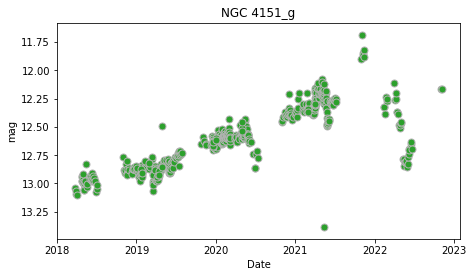

In [22]:
Name_index=2
name=CLAGN_Candidate_BAT.loc[Name_index,'AGN']
save_name=name.strip().replace(' ','_')


print(CLAGN_Candidate_BAT.loc[Name_index,'AGN'])
print(CLAGN_Candidate_BAT.loc[Name_index,'ra'],CLAGN_Candidate_BAT.loc[Name_index,'dec'])

band='g'

data_g = lightcurve.LCQuery.download_data(circle=[CLAGN_Candidate_BAT.loc[Name_index,'ra'],
                                                  CLAGN_Candidate_BAT.loc[Name_index,'dec'],1.0/3600], 
                                          bandname=band,BAD_CATFLAGS_MASK=32768)
ztflc_show_in_jupyter(data_g,name,band)

#lc_g = lightcurve.LCQuery(data_g)
#lc_g.show()

In [23]:
oids=[]
for oid in data_g['oid']:
    if oid not in oids:
        oids.append(oid)

In [24]:
oids

[715107400005470, 1713113300001769]

In [30]:
ztflc_show_in_jupyter(data_g[data_g['oid']==1713113300001769],name,band,formattime=False)


In [31]:
ztflc_show_in_jupyter(data_g[data_g['oid']==715107400005470],name,band,formattime=False)


In [ ]:
Name_index=2
name=CLAGN_Candidate_BAT.loc[Name_index,'AGN']
save_name=name.strip().replace(' ','_')


print(CLAGN_Candidate_BAT.loc[Name_index,'AGN'])
print(CLAGN_Candidate_BAT.loc[Name_index,'ra'],CLAGN_Candidate_BAT.loc[Name_index,'dec'])

band='r'


data_r = lightcurve.LCQuery.download_data(circle=[CLAGN_Candidate_BAT.loc[Name_index,'ra'],
                                                  CLAGN_Candidate_BAT.loc[Name_index,'dec'],1.0/3600], 
                                          bandname=band,BAD_CATFLAGS_MASK=32768)
ztflc_show_in_jupyter(data_r,name,band)

#lc_g = lightcurve.LCQuery(data_g)
#lc_g.show()

In [ ]:
Name_index=2
name=CLAGN_Candidate_BAT.loc[Name_index,'AGN']
save_name=name.strip().replace(' ','_')


print(CLAGN_Candidate_BAT.loc[Name_index,'AGN'])
print(CLAGN_Candidate_BAT.loc[Name_index,'ra'],CLAGN_Candidate_BAT.loc[Name_index,'dec'])

band='i'


data_i = lightcurve.LCQuery.download_data(circle=[CLAGN_Candidate_BAT.loc[Name_index,'ra'],
                                                  CLAGN_Candidate_BAT.loc[Name_index,'dec'],1.0/3600], 
                                          bandname=band,BAD_CATFLAGS_MASK=32768)
ztflc_show_in_jupyter(data_i,name,band)

#lc_g = lightcurve.LCQuery(data_g)
#lc_g.show()

## BAT150m

In [32]:
BAT_150month_catalog=pd.read_csv('/Users/lyubing/IHEPBox/data/AGNmass/BAT_150mdata/BAT_150month_catalog.csv')

In [33]:
BAT_150month_data=pd.read_csv('/Users/lyubing/IHEPBox/data/AGNmass/BAT_150mdata/BAT_150month_data.csv')

In [34]:
BAT_150month_data_CTAGN=pd.read_csv('/Users/lyubing/IHEPBox/data/AGNmass/BAT_150mdata/BAT_150month_data_CTAGN.csv')

In [40]:
BAT_150month_catalog_zlessthan0dot3=BAT_150month_catalog[BAT_150month_catalog['z']<0.3]
BAT_150month_catalog_zlessthan0dot3=drop_index(BAT_150month_catalog_zlessthan0dot3)

In [41]:
BAT_150month_catalog_zlessthan0dot3

SRC_NAME TYPE     RA_OBJ    DEC_OBJ       BAT_NAME  \
0    [VV2010c] J171245.9+291715  Sy2  258.19100  29.287600   J1712.7+2921   
1                  1E 0412-0803  Sy1   63.71900  -7.928000  4PBC J0414.8-   
2                1E 0459.5+0327  Sy1   75.53746   3.530810  4PBC J0502.2+   
3                  1ES 0054+145  Sy1   14.29142  14.769470  4PBC J0057.0+   
4                  1ES 0120+340  BLA   20.78600  34.347000  4PBC J0123.1+   
..                          ...  ...        ...        ...            ...   
639                   UGC 12348  Sy2  346.32800   0.189360   J2305.2+0008   
640                    UGC 3142  Sy1   70.94537  28.971945  4PBC J0443.7+   
641                    UGC 3478  Sy1   98.19517  63.673280  4PBC J0632.2+   
642                      Was 49  Sy1  183.57420  29.528723  4PBC J1214.2+   
643                     Z 77-21  AGN  227.28700   9.039050   J1509.2+0903   

         RA_BAT    DEC_BAT    OFFSET  ERR_RADIUS_95   MEAN_SIG    GAL_LONG  \
0    258.195130  29.359715  4.332259       4.878922   5.021983   51.704369   
1     63.721054  -7.919921  0.499823       1.243918  17.725725  200.992722   
2     75.571900   3.522090  2.127763       1.921829  10.860053  196.397705   
3     14.252778  14.749410  2.544672       3.019567   7.001356  124.949707   
4     20.776463  34.365820  1.224119       1.818483  11.584393  130.333847   
..          ...        ...       ...            ...        ...         ...   
639  346.310580   0.143326  2.953213       4.140682   5.708478   75.542559   
640   70.936300  28.970776  0.481311       0.957603  25.153960  172.084641   
641   98.053770  63.687393  3.855660       2.145678   9.178567  151.397110   
642  183.557700  29.540707  1.122427       1.767993  12.360718  194.337616   
643  227.324940   9.058040  2.520103       4.123674   5.509198   10.401533   

       GAL_LAT      z  
0    33.163864  0.105  
1   -38.259804  0.037  
2   -22.286486  0.016  
3   -48.100506  0.171  
4   -28.050369  0.272  
..         ...    ...  
639 -52.631769  0.030  
640 -11.002903  0.022  
641  22.066868  0.012  
642  81.467651  0.064  
643  52.808695  0.045  

[644 rows x 13 columns]

In [37]:
len(BAT_150month_data)

30

In [35]:
BAT_150month_data_CTAGN

Name        z          RA        DEC  \
0   2MASX J01073963-1139117  0.04746   16.915167 -11.653222   
1                   NGC 424  0.01180   17.865290 -38.083510   
2                  NGC 1068  0.00380   40.669880  -0.013290   
3               2MFGC 02280  0.01520   42.677500  54.704920   
4                  NGC 1142  0.02885   43.800817  -0.183557   
5                ESO 116-18  0.01850   51.221042 -60.738444   
6                  NGC 1358  0.01344   53.415303   5.089401   
7                 ESO 201-4  0.03590   57.599080 -50.309850   
8              CGCG 420-015  0.02940   73.357340   4.061580   
9             ESO 005-G 004  0.00620   91.423840 -86.631950   
10             ESO 426-G002  0.02243   95.943417 -32.216583   
11              LEDA 478026  0.04100  104.049900 -49.330540   
12             ESO 565-G019  0.01630  143.681550 -21.927840   
13           MCG +10-14-025  0.03940  143.965390  61.352920   
14                 NGC 3079  0.00370  150.490850  55.679790   
15                 NGC 3281  0.01067  157.967042 -34.853694   
16                 NGC 3393  0.01250  162.097780 -25.162030   
17               ESO 323-32  0.01600  193.334730 -41.635650   
18                 NGC 4945  0.00190  196.363660 -49.467900   
19          Circinus Galaxy  0.00140  213.291270 -65.339020   
20                 NGC 5643  0.00400  218.169910 -44.174610   
21                 NGC 5728  0.00930  220.599700 -17.253170   
22            ESO 137-G 034  0.00900  248.808810 -58.080030   
23                 NGC 6240  0.02450  253.245250   2.400990   
24                 NGC 6552  0.02650  270.030460  66.615110   
25                 NGC 6921  0.01450  307.146090  25.733380   
26                 NGC 7130  0.01620  327.081210 -34.951310   
27           NGC 7212 NED02  0.02670  331.758300  10.233470   
28                 NGC 7479  0.00790  346.236120  12.322880   
29             CGCG 475-040  0.03500  346.953600  22.710300   
30                 NGC 7582  0.00520  349.598420 -42.370570   
31                 NGC 7674  0.02892  351.986352   8.779035   

             Reference  
0            Zhao+2020  
1          Marchesi+18  
2          Marchesi+18  
3   Georgantopoulos+19  
4            Zhao+2020  
5          Marchesi+18  
6          Marchesi+18  
7          Marchesi+18  
8          Marchesi+18  
9          Marchesi+18  
10      Torres-Albà+21  
11      Torres-Albà+21  
12           Traina+21  
13              Oda+17  
14         Marchesi+18  
15           Zhao+2020  
16         Marchesi+18  
17      Torres-Albà+21  
18         Marchesi+18  
19          Arevalo+14  
20         Marchesi+18  
21           Zhao+2020  
22  Georgantopoulos+19  
23         Marchesi+18  
24      Torres-Albà+21  
25             Koss+16  
26         Marchesi+18  
27         Marchesi+18  
28         Marchesi+18  
29      Torres-Alba+21  
30         Marchesi+18  
31           Zhao+2019

## million quasar

## save_ztf_lc

In [47]:
CLAGN_Candidate_BAT_ZTF_dir

'/Volumes/ExtremeSSD/CLAGN_individual/CL_candidate/CLAGN_BAT_candidate/ZTF'

In [44]:
os.listdir(CLAGN_Candidate_BAT_ZTF_dir)

['NGC_526A_g.csv',
 'NGC_526A_i.csv',
 'NGC_526A_r.csv',
 'NGC_5548_g.csv',
 'NGC_5548_i.csv',
 'NGC_5548_r.csv',
 'NGC_4151_g.csv',
 'NGC_4151_i.csv',
 'NGC_4151_r.csv',
 'NGC_973_g.csv',
 'NGC_973_i.csv',
 'NGC_973_r.csv',
 'WKK_4374_g.csv',
 'WKK_4374_i.csv',
 'WKK_4374_r.csv',
 'NGC_2617_g.csv',
 'NGC_2617_i.csv',
 'NGC_2617_r.csv',
 'NGC_4507_g.csv',
 'NGC_4507_i.csv',
 'NGC_4507_r.csv',
 'Mrk3_g.csv',
 'Mrk3_i.csv',
 'Mrk3_r.csv',
 '2MASX_J04440903+2813003_g.csv',
 '2MASX_J04440903+2813003_i.csv',
 '2MASX_J04440903+2813003_r.csv',
 'NGC_4388_g.csv',
 'NGC_4388_i.csv',
 'NGC_4388_r.csv',
 'NGC_2110_g.csv',
 'NGC_2110_i.csv',
 'NGC_2110_r.csv',
 '2MASX_J10402231-4625264_g.csv',
 '2MASX_J10402231-4625264_i.csv',
 '2MASX_J10402231-4625264_r.csv',
 'IC_4709_g.csv',
 'IC_4709_i.csv',
 'IC_4709_r.csv',
 'UGC_03601_g.csv',
 'UGC_03601_i.csv',
 'UGC_03601_r.csv',
 '4C_50.55_g.csv',
 '4C_50.55_i.csv',
 '4C_50.55_r.csv',
 'NGC_4235_g.csv',
 'NGC_4235_i.csv',
 'NGC_4235_r.csv',
 'NGC_7679_g.

In [43]:
ztf_bands=['g','i','r']

In [ ]:
for Name_index,name in enumerate(CLAGN_Candidate_BAT['AGN']):
    save_name=name.strip().replace(' ','_')
    
    for band in ztf_bands:
        if not os.path.exists('%s/%s_%s.csv'%(CLAGN_Candidate_BAT_ZTF_dir,save_name,band)):
            data_g = lightcurve.LCQuery.download_data(circle=[CLAGN_Candidate_BAT.loc[Name_index,'ra'],CLAGN_Candidate_BAT.loc[Name_index,'dec'],1.0/3600], 
                                                  bandname=band,BAD_CATFLAGS_MASK=32768)
            data_g.to_csv('%s/%s_%s.csv'%(CLAGN_Candidate_BAT_ZTF_dir,save_name,band),index=False) 
            time.sleep(1+np.random.randint(2,5))  
        else:
            time.sleep(1)
    

In [ ]:
len(CLAGN_Candidate_BAT)

In [ ]:
26*3

NGC 4151


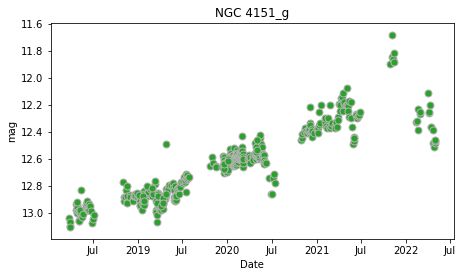

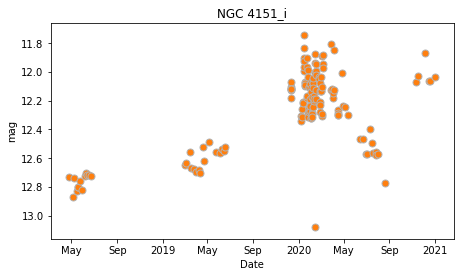

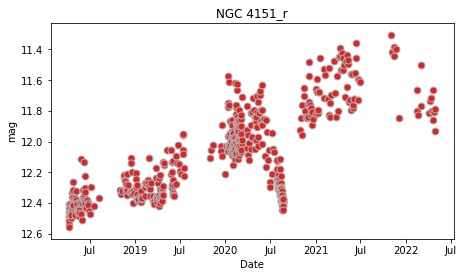

In [50]:
Name_index=2
name=CLAGN_Candidate_BAT.loc[Name_index,'AGN']
print(name)
save_name=name.strip().replace(' ','_')
band=ztf_bands[0]
#
for band in ztf_bands:
    if os.path.exists('%s/%s_%s.csv'%(CLAGN_Candidate_BAT_ZTF_dir,save_name,band)):
        data=pd.read_csv('%s/%s_%s.csv'%(CLAGN_Candidate_BAT_ZTF_dir,save_name,band)) 
         #ztflc_savepng(data,name,band)
        #ztflc_show_in_jupyter(data,name,band,formattime=False)    
        ztflc_show_in_jupyter(data,name,band)

for Name_index,name in enumerate(CLAGN_Candidate_BAT['AGN']):
    save_name=name.strip().replace(' ','_')    
    for band in ztf_bands:
        if os.path.exists('%s/%s_%s.csv'%(CLAGN_Candidate_BAT_ZTF_dir,save_name,band)):
            data=pd.read_csv('%s/%s_%s.csv'%(CLAGN_Candidate_BAT_ZTF_dir,save_name,band)) 
             ztflc_savepng(data,name,band)

In [ ]:
ztflc_show(data,name,band)

In [ ]:
data.columns

In [ ]:
lc_g.#.data

In [ ]:
data_i = lightcurve.LCQuery.download_data(circle=[299.412,50.55500,0.0014], bandname="i",BAD_CATFLAGS_MASK=15)

In [ ]:
data_r_3arcsec= lightcurve.LCQuery.download_data(circle=[299.412,50.55500,3.0/3600], bandname="r",BAD_CATFLAGS_MASK=15)
print(len(data_r_3arcsec))

## BAD_CATFLAGS_MASK=0

In [ ]:
CLAGN_Candidate_BAT_ZTF_dir_1

In [ ]:
for Name_index,name in enumerate(CLAGN_Candidate_BAT['AGN']):
    save_name=name.strip().replace(' ','_')
    
    for band in ztf_bands:
        if not os.path.exists('%s/%s_%s.csv'%(CLAGN_Candidate_BAT_ZTF_dir_1,save_name,band)):
            data_g = lightcurve.LCQuery.download_data(circle=[CLAGN_Candidate_BAT.loc[Name_index,'ra'],
                                                              CLAGN_Candidate_BAT.loc[Name_index,'dec'],1.0/3600], 
                                                  bandname=band,BAD_CATFLAGS_MASK=0)
            data_g.to_csv('%s/%s_%s.csv'%(CLAGN_Candidate_BAT_ZTF_dir_1,save_name,band),index=False) 
            time.sleep(1+np.random.randint(2,5))  
        else:
            time.sleep(1)
    

## save CLAGN_list data

In [16]:
CLAGN_Candidate_BAT_ZTF_dir_2='/Volumes/ExtremeSSD/data_source/ZTFdata/CLAGNztf/20230703/'

In [18]:
print(CLAGN_Candidate_BAT_ZTF_dir_2)

/Volumes/ExtremeSSD/data_source/ZTFdata/CLAGNztf/20230703/


In [23]:
for Name_index,name in enumerate(CLAGN_list202206['Name']):
    save_name=name.strip().replace(' ','_')
    
    #for band in ztf_bands:
    if not os.path.exists('%s/%s.csv'%(CLAGN_Candidate_BAT_ZTF_dir_2,save_name)):
        data_g = lightcurve.LCQuery.download_data(circle=[CLAGN_list202206.loc[Name_index,'ra_deg'],
                                                          CLAGN_list202206.loc[Name_index,'dec_deg'],2.0/3600], 
                                                           #bandname=band,
                                                           BAD_CATFLAGS_MASK=32768)
        if len(data_g)>10:
            data_g.to_csv('%s/%s.csv'%(CLAGN_Candidate_BAT_ZTF_dir_2,save_name),index=False) 
            time.sleep(1+np.random.randint(3,10))  
    else:
        time.sleep(2)
    

for Name_index,name in enumerate(CLAGN_list202206['Name']):
    save_name=name.strip().replace(' ','_')
    
    if not os.path.exists('%s/%s_gir.csv'%(CLAGN_Candidate_BAT_ZTF_dir_2,save_name)):
        data_g = lightcurve.LCQuery.download_data(circle=[CLAGN_list202206.loc[Name_index,'ra_deg'],
                                                          CLAGN_list202206.loc[Name_index,'dec_deg'],1.0/3600], 
                                              bandname='g,i,r',BAD_CATFLAGS_MASK=0)
        data_g.to_csv('%s/%s_gir.csv'%(CLAGN_Candidate_BAT_ZTF_dir_2,save_name),index=False) 
        time.sleep(1+np.random.randint(3,10))  
    else:
        time.sleep(2)
    

In [27]:
!ls /Volumes/ExtremeSSD/data_source/ZTFdata/CLAGNztf/20230703/*.csv | wc -l

     135


# LAMOST_ZTF

## download lamost qso

In [9]:
lamostdr10_12_ztfdata='/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12'
if not os.path.exists(lamostdr10_12_ztfdata):
    os.mkdir(lamostdr10_12_ztfdata)

In [10]:
import pandas as pd
pd_asera=pd.read_csv('/Users/lyubing/Downloads/dr10_dr11q12_asera_check.csv')

In [11]:
pd_asera_QSOandCandidates=pd_asera[pd_asera['label']<3]
pd_asera_QSOandCandidates=drop_index(pd_asera_QSOandCandidates)

In [12]:
len(pd_asera_QSOandCandidates)

4526

In [27]:
for index,path in enumerate(pd_asera_QSOandCandidates['#cols: spUrl']):
    path_i= path[8:]
    
    hdul_i=fits.open(path_i)
    obsid_i= hdul_i[0].header['OBSID']
    ra=hdul_i[0].header['RA']
    dec=hdul_i[0].header['DEC']
    
    
    save_name= 'id%dra%.5f_dec%.5f'%(obsid_i,ra,dec)
    
    #for band in ztf_bands:
    if not os.path.exists('%s/%s.csv'%(lamostdr10_12_ztfdata,save_name)):
        data_g = lightcurve.LCQuery.download_data(circle=[ra,
                                                          dec,2.0/3600], 
                                                           #bandname=band,
                                                           BAD_CATFLAGS_MASK=32768)
            
        pd_ztf_i=data_g
        pd_ztf_i_zg=pd_ztf_i[pd_ztf_i['filtercode']=='zg']
        pd_ztf_i_zr=pd_ztf_i[pd_ztf_i['filtercode']=='zr']
        pd_ztf_i_zi=pd_ztf_i[pd_ztf_i['filtercode']=='zi']

        if len(pd_ztf_i_zg)>0 and len(pd_ztf_i_zr)>0:                
                data_g.to_csv('%s/%s.csv'%(lamostdr10_12_ztfdata,save_name),index=False) 
                time.sleep(1+np.random.randint(3,10))  
        else:
            print(index,save_name)
            #time.sleep(2)

25 id937812105ra45.60576_dec10.02769
141 id948805173ra143.19367_dec15.53964
153 id948809196ra145.43437_dec17.06064
167 id948813134ra146.29346_dec16.95122
168 id948813143ra146.30575_dec17.12854
210 id949707015ra75.76135_dec10.07962
216 id949901104ra45.73807_dec45.47209
242 id950313070ra10.54126_dec23.48996
260 id961207206ra61.36798_dec4.16413
268 id963601015ra174.92533_dec6.51312
300 id964609094ra200.23356_dec2.70913
310 id964615203ra199.09498_dec2.66902
353 id965309047ra149.19257_dec38.76953
358 id965401015ra174.92533_dec6.51310
379 id965406153ra176.96141_dec7.43814
391 id965411231ra174.64254_dec9.84751
394 id965413059ra176.68215_dec8.20788
399 id965416142ra174.03857_dec10.03869
417 id966112125ra66.83378_dec-0.97807
432 id966307069ra113.24197_dec13.67856
439 id966311188ra112.18699_dec17.04387
440 id966312070ra113.17883_dec17.05359
452 id966402089ra154.95704_dec15.51593
456 id966403086ra155.22646_dec16.96335
482 id966410161ra154.97311_dec16.13190
520 id974202133ra203.38697_dec6.49293
52

4364 id1113102236ra225.61531_dec20.98266
4386 id1113115080ra225.90954_dec23.58341
4389 id1113116126ra225.94935_dec24.45157
4390 id1113701016ra214.66119_dec2.02129
4391 id1113701033ra214.62336_dec1.78453
4397 id1113702062ra212.92048_dec2.68547
4398 id1113702088ra212.72691_dec2.26383
4407 id1113703076ra213.27120_dec3.61669
4412 id1113705099ra214.40952_dec2.57406
4417 id1113705150ra214.68828_dec3.06527
4418 id1113705215ra213.69547_dec2.58463
4421 id1113706008ra216.25002_dec2.67757
4425 id1113706206ra216.34345_dec2.71106
4426 id1113707146ra215.55527_dec1.71027
4435 id1113708181ra215.10675_dec2.70785
4447 id1113710112ra212.80613_dec3.02149
4464 id1113714019ra212.73069_dec4.88706
4466 id1113714091ra213.25270_dec4.47977
4467 id1113714133ra212.85795_dec4.64336
4471 id1113715024ra214.58009_dec4.69308
4475 id1113715193ra214.59556_dec4.42601
4484 id1113801087ra228.27258_dec3.49055
4485 id1113801092ra228.28061_dec3.58450
4487 id1113802097ra226.47727_dec3.56620
4494 id1113804159ra228.34340_dec5.212

In [24]:
for index,path in enumerate(pd_asera_QSOandCandidates['#cols: spUrl']):
    path_i= path[8:]
    
    hdul_i=fits.open(path_i)
    obsid_i= hdul_i[0].header['OBSID']
    ra=hdul_i[0].header['RA']
    dec=hdul_i[0].header['DEC']
    
    
    save_name= 'id%dra%.5f_dec%.5f'%(obsid_i,ra,dec)
    
    path_ztf_i='%s/%s.csv'%(lamostdr10_12_ztfdata,save_name)

    if os.path.exists(path_ztf_i):
        #print(save_name)
        pd_ztf_i=pd.read_csv(path_ztf_i)           
        pd_ztf_i_zg=pd_ztf_i[pd_ztf_i['filtercode']=='zg']
        pd_ztf_i_zr=pd_ztf_i[pd_ztf_i['filtercode']=='zr']
        pd_ztf_i_zi=pd_ztf_i[pd_ztf_i['filtercode']=='zi']

        if len(pd_ztf_i_zg)<1:
            #print('rm %s'%path_ztf_i)
            os.remove(path_ztf_i)
            #os.system('rm %s'%path_ztf_i)
        elif len(pd_ztf_i_zr)<1:
            #print('rm %s'%path_ztf_i)
            #os.system('rm %s'%path_ztf_i) 
            os.remove(path_ztf_i)
        #elif len(pd_ztf_i_zi)<1:
            #print('rm %s'%path_ztf_i)
            #os.system('rm %s'%path_ztf_i) 
            #os.remove(path_ztf_i)  

In [21]:
lamostdr10_12_ztfdata

'/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12'

In [28]:
ls /Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/*.csv | wc -l

    4280


In [29]:
ls /Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/*.csv | wc -l

    4280


In [50]:
for index,path in enumerate(pd_asera_QSOandCandidates['#cols: spUrl']):
    path_i= path[8:]
    
    hdul_i=fits.open(path_i)
    obsid_i= hdul_i[0].header['OBSID']
    ra=hdul_i[0].header['RA']
    dec=hdul_i[0].header['DEC']
       
    save_name= 'id%dra%.5f_dec%.5f'%(obsid_i,ra,dec)
    print('%s/%s.csv'%(lamostdr10_12_ztfdata,save_name))

/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id937801018ra44.35506_dec6.76205.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id937802019ra42.30639_dec6.90789.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id937802054ra42.55799_dec7.24886.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id937802059ra42.27189_dec7.13619.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id937802087ra42.24279_dec6.69545.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id937802213ra43.34877_dec6.52982.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id937802222ra43.32375_dec6.39050.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id937802227ra42.95822_dec6.81634.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id937803013ra43.31851_dec7.85917.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id937803085ra42.82207_dec8.24906.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id937804044ra43.89645_dec8.92669.csv

/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id948813046ra146.75067_dec16.72498.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id948813103ra145.95115_dec17.48579.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id948813134ra146.29346_dec16.95122.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id948813143ra146.30575_dec17.12854.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id948813148ra146.11978_dec16.98936.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id948815195ra143.89074_dec17.04575.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id948815203ra143.73456_dec17.91665.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id948816070ra143.32399_dec18.19709.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id948816078ra142.79999_dec17.58207.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id948816088ra142.55318_dec17.61570.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id948816106ra143

/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id965208230ra111.44698_dec17.06815.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id965209035ra111.80610_dec18.12224.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id965209199ra111.85489_dec18.33366.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id965209203ra111.48907_dec17.91866.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id965209212ra111.71945_dec17.79211.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id965211011ra110.38520_dec19.26013.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id965211075ra111.23602_dec19.31117.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id965211111ra111.17040_dec19.59361.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id965212139ra111.35087_dec19.10914.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id965213061ra113.00484_dec17.44057.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id965213173ra112

/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id973910245ra95.98000_dec43.03750.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id973913048ra101.81543_dec44.00672.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id973914033ra95.76483_dec43.95182.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id973914063ra96.77824_dec43.98639.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id973915054ra97.77493_dec44.54290.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id974201056ra203.60848_dec6.38533.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id974201056ra203.60848_dec6.38533.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id974202133ra203.38697_dec6.49293.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id974202223ra202.92595_dec6.42603.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id974203121ra202.70102_dec8.67756.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id974207213ra204.49303_de

/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id980305044ra211.29691_dec11.35240.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id980305149ra211.25672_dec11.80290.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id980308218ra211.49253_dec11.33348.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id980309157ra211.33106_dec13.61086.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id980311156ra210.28271_dec14.82358.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id980311159ra210.41454_dec14.97418.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id980311178ra210.80149_dec14.59711.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id980315063ra209.79863_dec13.57051.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id980316156ra209.69291_dec14.05679.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id988701002ra200.05346_dec-0.54978.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id988701036ra199

/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id991015107ra209.37468_dec25.79891.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id991015122ra209.57020_dec25.83037.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id991015192ra209.19956_dec25.82492.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id991015213ra209.07415_dec26.42467.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id991016115ra208.85604_dec26.68352.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id991016117ra208.72619_dec26.77064.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id991016143ra208.33671_dec26.86371.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id991104055ra243.47250_dec-1.54174.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id991201079ra118.67340_dec10.79767.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id991202116ra117.26817_dec10.62845.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id991202180ra117

/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id993406082ra160.29086_dec-4.40778.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id993406096ra160.45532_dec-4.24716.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id993407028ra160.11660_dec-5.74921.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id993407042ra160.12615_dec-5.71276.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id993407056ra159.69939_dec-5.24523.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id993407081ra160.47519_dec-5.33873.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id993407094ra160.31936_dec-5.31735.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id993407236ra160.10942_dec-5.38419.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id993408034ra159.43887_dec-3.96867.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id993408063ra159.97683_dec-4.41885.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id993408102ra159

/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id995809126ra190.54254_dec4.55034.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id995809181ra190.55311_dec4.73776.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id995811061ra190.03174_dec6.12681.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id995811088ra189.41571_dec6.03158.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id995811090ra189.23849_dec6.01875.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id995811096ra189.21469_dec6.01046.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id995812095ra190.49107_dec5.64248.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id995813008ra191.69873_dec4.71725.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id995813129ra191.42333_dec4.82256.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id995813178ra191.82587_dec5.04562.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id995813228ra190.95886_dec

/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id998413230ra215.38462_dec24.17561.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id998413238ra215.35694_dec24.22876.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id998414188ra211.62602_dec23.91854.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id998414207ra211.93831_dec24.39035.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id998415040ra213.83897_dec24.96216.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id998415049ra213.65095_dec24.98447.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id998415057ra212.63056_dec24.51841.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id998415096ra212.85650_dec24.74215.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id998415143ra214.02168_dec24.76047.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id998416032ra211.99270_dec25.38524.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id998607017ra133

/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1002216072ra187.01943_dec-0.08529.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1002701088ra266.48201_dec4.07386.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1002709202ra267.18478_dec6.12860.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1002716226ra265.48920_dec7.74304.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1003102103ra213.46760_dec1.71111.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1003102107ra213.36921_dec1.77554.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1003103013ra213.88090_dec3.18438.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1003103052ra213.18203_dec3.90247.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1003103109ra213.29915_dec4.04833.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1003104005ra214.44498_dec3.41573.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1003106206ra2

/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1009714172ra226.64587_dec5.58429.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1009714237ra226.29632_dec5.62410.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1009715009ra228.18049_dec6.18290.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1009715038ra228.60425_dec6.46584.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1009715143ra228.63722_dec6.13358.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1009715176ra228.29002_dec5.96959.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1009715203ra227.90034_dec6.52860.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1009716119ra227.65984_dec6.75300.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1009716129ra227.55018_dec6.92067.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1009716149ra227.70156_dec6.99776.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1009716193ra22

/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1046401079ra27.69694_dec18.75861.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1046401147ra27.36241_dec18.41466.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1046401148ra27.34575_dec18.25633.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1046401239ra28.06266_dec18.39290.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1046402027ra26.10902_dec19.20073.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1046402117ra26.17848_dec18.65388.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1046402192ra26.32950_dec18.86306.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1046402197ra26.49782_dec18.77855.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1046403029ra26.81512_dec20.10830.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1046403082ra26.27211_dec20.42946.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1046403135ra27

/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1047611082ra34.87112_dec25.14589.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1047611088ra35.21356_dec25.15761.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1047611106ra35.77894_dec25.60829.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1047611117ra35.71091_dec25.46362.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1047611120ra35.70699_dec25.40361.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1047611126ra35.07811_dec25.57153.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1047611167ra34.77000_dec25.79846.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1047611209ra35.41737_dec25.84982.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1047612011ra37.02619_dec25.05257.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1047612017ra36.94893_dec24.80446.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1047612020ra37

/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1049102122ra351.54266_dec48.40263.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1049102167ra352.35519_dec48.23190.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1049103008ra353.11921_dec49.70129.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1049103106ra351.65954_dec50.64200.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1049104141ra353.33382_dec50.32623.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1049104203ra354.20189_dec50.53278.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1049104236ra353.47969_dec50.88370.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1055007149ra29.03312_dec18.61419.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1055005059ra27.59740_dec19.85048.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1058801225ra7.39153_dec32.63406.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id10559101

/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1071414062ra22.90021_dec21.43172.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1071504234ra60.46265_dec-1.08559.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1071506159ra62.99283_dec-2.17265.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1071506181ra62.39334_dec-2.29395.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1071508042ra61.27820_dec-1.84552.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1071508082ra61.64536_dec-1.82016.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1071508183ra61.17407_dec-2.64720.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1071509012ra61.54653_dec-1.27409.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1071509136ra61.94510_dec-1.37775.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1071509176ra61.68707_dec-1.06242.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1071511027ra61

/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072115023ra29.29825_dec41.83412.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072115048ra29.57486_dec42.16119.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072115080ra28.32562_dec41.73347.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072115112ra29.43579_dec41.64004.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072206046ra31.98758_dec40.66417.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072209086ra30.34970_dec42.11761.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072209151ra30.08905_dec41.59756.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072209246ra30.98165_dec40.90990.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072210232ra27.42392_dec40.10738.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072211016ra28.88295_dec42.72714.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072211093ra28

/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072906151ra168.28156_dec28.28785.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072906196ra167.89548_dec28.19078.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072907013ra167.84787_dec27.70222.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072907121ra167.73287_dec27.66170.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072907193ra166.61600_dec26.81245.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072909002ra166.71308_dec28.95981.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072909023ra166.52156_dec29.06859.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072909110ra166.35543_dec29.81187.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072910221ra163.34888_dec27.83261.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072912112ra167.66751_dec30.31940.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1072

/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1074005113ra162.25506_dec12.20394.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1074005154ra162.05974_dec12.76141.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1074006010ra164.49393_dec12.58326.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1074006073ra165.26375_dec13.56133.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1074006082ra164.58325_dec13.16358.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1074006114ra165.31430_dec12.85077.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1074006180ra164.76372_dec13.07014.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1074007055ra164.20289_dec12.14078.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1074007112ra164.65094_dec12.31453.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1074007199ra163.94307_dec11.50555.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id1074

/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id949413110ra140.12170_dec41.25628.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id949414219ra135.42037_dec41.04320.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id949414219ra135.42037_dec41.04320.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id949811121ra111.59700_dec42.61639.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id950001155ra137.93169_dec38.04465.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id950205074ra359.99450_dec-1.20698.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id950207081ra1.73282_dec-1.64079.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id950209057ra0.62799_dec0.83312.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id950313234ra9.66167_dec23.74269.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id951503088ra149.03857_dec46.03170.csv
/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/id951503088ra149.03857_

In [41]:
path_i=pd_asera_QSOandCandidates['#cols: spUrl'][0][8:]

In [44]:
hdul_i=fits.open(path_i)
obsid_i= hdul_i[0].header['OBSID']

In [45]:
obsid_i

937801018

In [47]:
hdul_i[0].header['RA'],hdul_i[0].header['DEC']

(44.355063, 6.762051)

In [49]:
hdul_i[0].header

SIMPLE  =                    T /Primary Header created by MWRFITS v1.11b        
BITPIX  =                   16 /                                                
NAXIS   =                    0 / Number of array dimensions                     
NAXIS1  =                 3909 /                                                
NAXIS2  =                    5 /                                                
EXTEND  =                    T /                                                
                                                                                
COMMENT --------FILE INFORMATION                                                
FILENAME= 'spec-59550-HD100305N461149M02_sp15-169.fits' /                       
OBSID   =            948415169 / Unique number ID of this spectrum              
AUTHOR  = 'LAMOST Pipeline'    / Who compiled the information                   
DATA_V  = 'LAMOST DR10 Q1'     / Data release version                           
N_EXTEN =                   

## dr10matchsdss16 deltaz<0.1

In [14]:
Fits_DR10_dir='/Users/lyubing/Downloads/LAMOST/LAMOST_DR10/'
LAMOST_dr10_qsobySDSS_dir=os.path.join(Fits_DR10_dir,'LAMOST_dr10_qsobySDSS/')  

In [ ]:
dr10matchsdss16files_fits_path=[]
dr10matchsdss16files_fits=os.listdir('/Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/')
for i in dr10matchsdss16files_fits:
    if i.endswith('fits.gz'):
        dr10matchsdss16files_fits_path.append(i)

In [ ]:
LAMOSTDR10_SDSS16=pd.read_csv('/Users/lyubing/Downloads/LAMOST_青年研究员/LAMOST_DR10_SDSS16_brettlv_0.csv') #zwarning=0
LAMOSTDR10_SDSS16_QSO=LAMOSTDR10_SDSS16[LAMOSTDR10_SDSS16['class']=='QSO']
LAMOSTDR10_SDSS16_QSO=drop_index(LAMOSTDR10_SDSS16_QSO)

In [17]:
import os
lamostdr10_12_matchSDSS_ztfdata='/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12_matchSDSS'
if not os.path.exists(lamostdr10_12_matchSDSS_ztfdata):
    os.mkdir(lamostdr10_12_matchSDSS_ztfdata)

In [5]:
pwd

'/Users/lyubing/blog/brettlv.github.io_origin/pythoncode/changinglookAGN'

In [6]:
lamostdr10_12_matchSDSS_ztfdata

'/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12_matchSDSS'

In [7]:
!open /Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12_matchSDSS

In [31]:
ls /Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/*.csv | wc -l

    4280


In [30]:
ls /Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12/*.csv | wc -l

    4280


In [19]:
ls /Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12_matchSDSS/*.csv | wc -l

    1172


In [15]:
LAMOST_dr10_qsobySDSS_dir

'/Users/lyubing/Downloads/LAMOST/LAMOST_DR10/LAMOST_dr10_qsobySDSS/'

In [18]:
lamostdr10_12_matchSDSS_ztfdata

'/Volumes/ExtremeSSD/data_source/ZTFdata/LAMOSTdr10_12_matchSDSS'

Delta_z_lt0dot1_obs=[]
Z_lamost=[]
Z_SDSS=[]

for i in dr10matchsdss16files_fits_path:    
    files_fits_path_i=os.path.join(LAMOST_dr10_qsobySDSS_dir,i)
    if os.path.exists(files_fits_path_i):
        hdul_i=fits.open(files_fits_path_i)
        obsid_i= hdul_i[0].header['OBSID']
    
        ra=hdul_i[0].header['RA']
        dec=hdul_i[0].header['DEC']

        if  len(LAMOSTDR10_SDSS16_QSO[LAMOSTDR10_SDSS16_QSO['OBSID']==obsid_i])>0:
            LAMOSTDR10_SDSS16_QSO_i= LAMOSTDR10_SDSS16_QSO[LAMOSTDR10_SDSS16_QSO['OBSID']==obsid_i]
            if abs(hdul_i[0].header['Z']-LAMOSTDR10_SDSS16_QSO_i['z2'].values[0])<0.1:
                Delta_z_lt0dot1_obs.append(files_fits_path_i)
                Z_lamost.append(hdul_i[0].header['Z'])
                Z_SDSS.append(LAMOSTDR10_SDSS16_QSO_i['z2'].values[0])
                
                #print('*****,',obsid_i)
                #print(hdul_i[0].header['Z'],hdul_i[0].header['Z_ERR'],LAMOSTDR10_SDSS16_QSO_i['z2'].values[0],hdul_i[0].header['Z']-LAMOSTDR10_SDSS16_QSO_i['z2'].values[0])
                #print(LAMOSTDR10_SDSS16_QSO_i)
                #print('************************')
                save_name= 'id%dra%.5f_dec%.5f'%(obsid_i,ra,dec)
    
                #for band in ztf_bands:
                if not os.path.exists('%s/%s.csv'%(lamostdr10_12_matchSDSS_ztfdata,save_name)):
                    data_g = lightcurve.LCQuery.download_data(circle=[ra,
                                                                      dec,2.0/3600], 
                                                                       #bandname=band,
                                                                       BAD_CATFLAGS_MASK=32768)
                    if len(data_g)>5:
                        data_g.to_csv('%s/%s.csv'%(lamostdr10_12_matchSDSS_ztfdata,save_name),index=False) 
                        time.sleep(1+np.random.randint(3,10))  
                else:
                    time.sleep(2)